## Pumpkin Pricing

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

- Only get pumpkins priced by the bushel
- Convert the date to a month
- Calculate the price to be an average of high and low prices
- Convert the price to reflect the pricing by bushel quantity

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv('../data/US-pumpkins.csv')

pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

columns_to_select = ['Package', 'Variety', 'City Name', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()


C:\Users\Alejandra PY\AppData\Local\Temp\ipykernel_10536\2637987050.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)


,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364


A basic scatterplot reminds us that we only have month data from August through December. We probably need more data to be able to draw conclusions in a linear fashion.

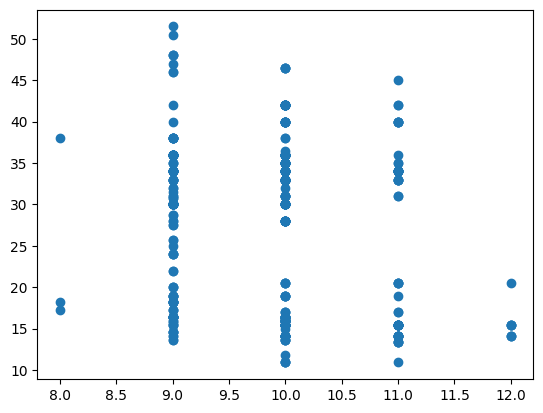

In [3]:
import matplotlib.pyplot as plt
plt.scatter('Month','Price',data=new_pumpkins)

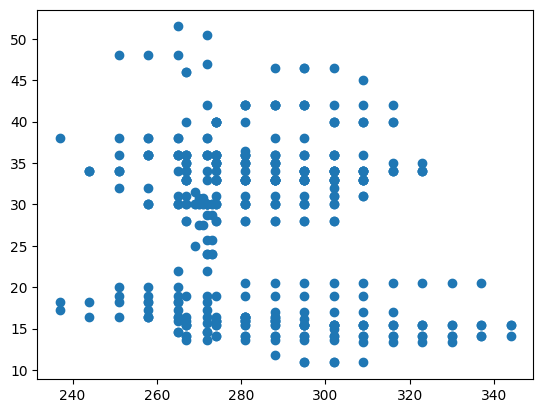

In [4]:

plt.scatter('DayOfYear','Price',data=new_pumpkins)

In [7]:
#Print correlation values
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))

-0.14878293554077535
-0.16673322492745407


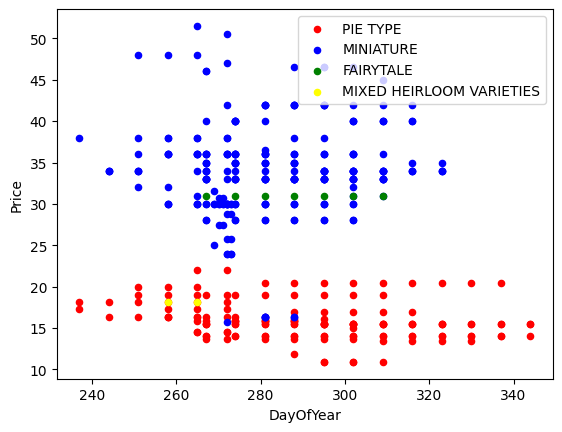

In [8]:
#Define color to use to plot pumpkins varieties
colors=['red', 'blue', 'green', 'yellow']
#Plot price vs day of year for the pumpkins
ax=None
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    df=new_pumpkins[new_pumpkins['Variety']==var]
    ax=df.plot.scatter('DayOfYear', 'Price',ax=ax, c=colors[i], label=var )

<Axes: xlabel='Variety'>

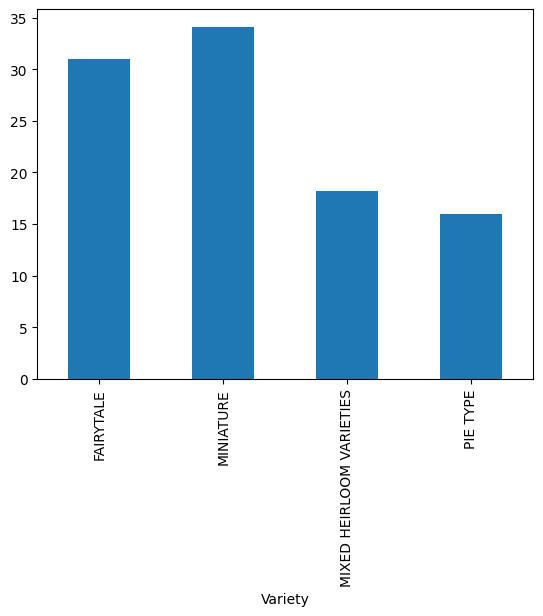

In [9]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')

<Axes: xlabel='DayOfYear', ylabel='Price'>

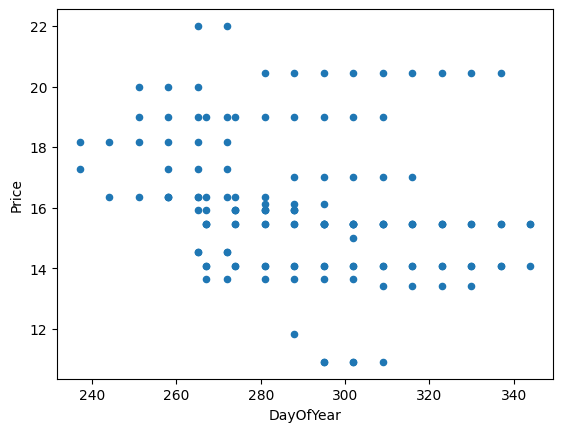

In [10]:
pie_pumpkins= new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
pie_pumpkins.plot.scatter('DayOfYear', 'Price')

In [12]:
#Correlation between month and price
print(pie_pumpkins['Month'].corr(pie_pumpkins['Price']))
#Correlation between day of the year and price
print(pie_pumpkins['DayOfYear'].corr(pie_pumpkins['Price']))

-0.23841413206125714
-0.2669192282197318


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [15]:
#Get day of the year and price in different arrays
x= pie_pumpkins['DayOfYear']. to_numpy().reshape(-1,1)
y=pie_pumpkins['Price']
#Print shape
x.shape

(144, 1)

In [16]:
#Split data into training and validation
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
#Create a linear regression object
lin_reg= LinearRegression()
#Train the model using our training data
lin_reg.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
#Test the model using our test data
pred= lin_reg.predict(x_test)
pred

array([16.21096253, 16.73652536, 16.08833121, 15.35254325, 15.96569988,
       16.73652536, 16.21096253, 16.36863138, 16.61389403, 15.84306855,
       15.84306855, 15.72043723, 16.21096253, 15.5978059 , 16.45622519,
       15.72043723, 15.5978059 , 16.08833121, 15.72043723, 16.36863138,
       16.85915669, 16.21096253, 15.22991192, 16.21096253, 15.84306855,
       16.45622519, 16.08833121, 15.84306855, 15.5978059 ])

In [20]:
#calculate mean squared error
mse= np.sqrt(mean_squared_error(y_test,pred))
#Print the mean squared error in an easy to read format
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 2.77 (17.2%)


Mean error is big, which suggests predictions aren't accurate

In [21]:
#Calculate the coefficient of determination
score=lin_reg.score(x_train, y_train)
print('Model determination: ', score)

Model determination:  0.04460606335028361


The closer model determination is to 1, the better the model fits the data

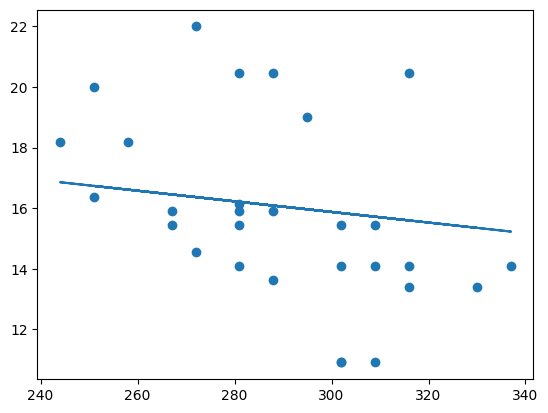

In [22]:
#create scatter plot with test data
plt.scatter(x_test, y_test)
#Add a line to the plot with the predictions
plt.plot(x_test, pred)

In [24]:
#Print the slope and the intercept
print(f"y={lin_reg.coef_[0]}x+{lin_reg.intercept_}")

y=-0.017518760953105x+21.133734359909326


In [25]:
lin_reg.predict([[256]])

array([16.64893156])

Mean error: 2.73 (17.0%)


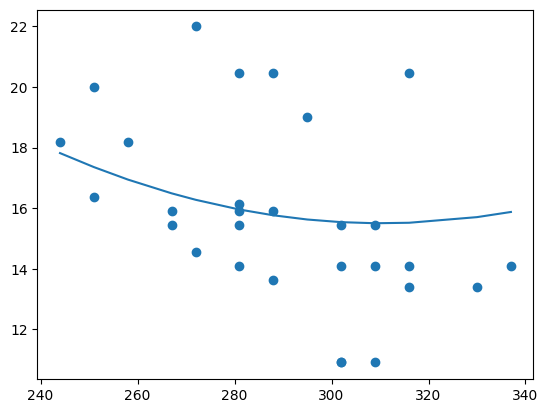

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#Build a polynomial regression pipeline
pipeline= make_pipeline(PolynomialFeatures(2), LinearRegression())

#Use the pipeline to build the model
pipeline.fit(x_train, y_train)

#Test the model with our test data
pred=pipeline.predict(x_test)

#Calculate and print the mean squared error
mse=np.sqrt(mean_squared_error(y_test, pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

#Plot the results
plt.scatter (x_test, y_test)
plt.plot(sorted(x_test),pipeline.predict(sorted(x_test)))

In [28]:
#Score the model
score= pipeline.score(x_train, y_train)
print('Model determination: ', score)

Model determination:  0.07639977655280128


Both mse and determination score are better but just slightly. Those still need to be refined to giv accurate predictions.

In [31]:
#Convert variety into categorical feature
pd.get_dummies(new_pumpkins['Variety'])


,FAIRYTALE,MINIATURE,MIXED HEIRLOOM VARIETIES,PIE TYPE
70,False,False,False,True
71,False,False,False,True
72,False,False,False,True
73,False,False,False,True
74,False,False,False,True
...,...,...,...,...
1738,False,True,False,False
1739,False,True,False,False
1740,False,True,False,False
1741,False,True,False,False


In [36]:
#Get new x value with categorical values of columns variety, city and package 
X=pd.get_dummies(new_pumpkins['Variety'])\
    .join(new_pumpkins['Month'])\
    .join(pd.get_dummies(new_pumpkins['City']))\
    .join(pd.get_dummies(new_pumpkins['Package']))
#Get y value as price
y=new_pumpkins['Price']
X

,FAIRYTALE,MINIATURE,MIXED HEIRLOOM VARIETIES,PIE TYPE,Month,ATLANTA,BALTIMORE,BOSTON,CHICAGO,COLUMBIA,DETROIT,NEW YORK,PHILADELPHIA,SAN FRANCISCO,ST. LOUIS,1 1/9 bushel cartons,1 1/9 bushel crates,1/2 bushel cartons,bushel baskets,bushel cartons
70,False,False,False,True,9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
71,False,False,False,True,9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
72,False,False,False,True,10,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
73,False,False,False,True,10,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
74,False,False,False,True,10,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,False,True,False,False,9,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
1739,False,True,False,False,9,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
1740,False,True,False,False,9,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
1741,False,True,False,False,9,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False


In [39]:
#make train-test split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)
#Create linear regression object
lin_reg= LinearRegression()
#Train model using train data
lin_reg.fit(X_train, y_train)
#Test model using test data
pred=lin_reg.predict(X_test)

#Calculate mean squared error
mse=np.sqrt(mean_squared_error(y_test,pred))
print((f'Mean error:{mse:3.3} ({mse/np.mean(pred)*100:3.3}%)'))

#Calcuate coefficient of determination
score=lin_reg.score(X_train, y_train)
print('Model determination: ', score)

Mean error:2.84 (10.5%)
Model determination:  0.9401401953107826


The mean error is less than the previous testing. It passed from 17% to 10%. To try to make it better, polynomial regression.

In [41]:
#make train-test split
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

#Build a polynomial regression pipeline
pipeline= make_pipeline(PolynomialFeatures(2), LinearRegression())

#Use the pipeline to build the model
pipeline.fit(x_train, y_train)

#Test the model with our test data
pred=pipeline.predict(x_test)

#Calculate and print the mean squared error
mse=np.sqrt(mean_squared_error(y_test, pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')
#Calculate determination score
score=pipeline.score(x_train, y_train)
print('Model determination: ',score)
#Plot the results

Mean error: 2.23 (8.28%)
Model determination:  0.9653029999448537


The model improved to a quality of almost 97% according to the determination score ans amse of 8.28%

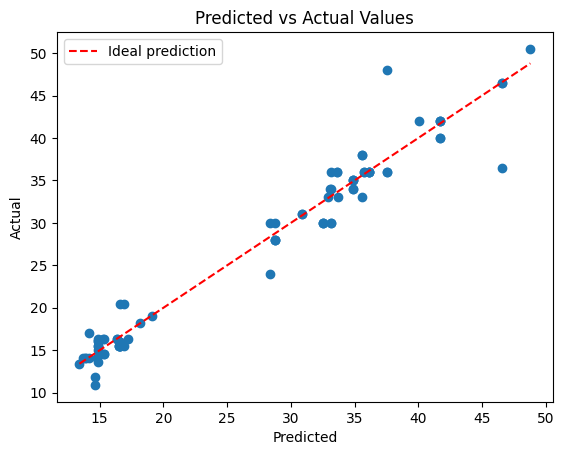

In [52]:
plt.plot([min(pred), max(pred)], [min(pred), max(pred)], color='red', linestyle='--', label='Ideal prediction')
plt.scatter(pred, y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.show()
